## Загрузка библиотек

In [62]:
import pandas as pd

import matplotlib.pyplot as plt

%matplotlib inline 


## Загрузка данных

Для начала работы нам необходимо научиться читать набор данных. В данном домашнем задании мы поработаем с двумя наборами данных.

__covid.csv__ ([источник](https://www.kaggle.com/gpreda/covid-world-vaccination-progress)) - статистика по вакцинированию от COVID19 по разным странам. Для данного датасета нет конкретной предсказательной переменной.

__hr.csv__ ([источник](https://www.kaggle.com/arashnic/hr-analytics-job-change-of-data-scientists)) - набор данных большего размера. Он содержит статистику по людям, проходящим курсы по Big Data & ML. _Target_ - 1 или 0, сменил ли человек работу после прохождения курсов - или нет.

Реализуйте методы `read_covid_dataset` и `read_hr_dataset`. Каждый из них принимает на вход путь к набору данных и возвращает выборку `X` и соответствующие метки `y`. В случае _covid_ датасета `y` возвращается как `None`. 

In [63]:
def read_covid_dataset(path_to_csv):
    df = pd.read_csv(path_to_csv)
    col = df.columns
    X = df[col]
    y = None
    # Возвращает пару из X и y. X - массив векторов. y - соответствующие векторам метки
    return X, y


def read_hr_dataset(path_to_csv):
    df = pd.read_csv(path_to_csv)
    col = df.columns
    X = df[col[:-1]]
    df
    y = df['target']
    # Возвращает пару из X и y. X - массив векторов. y - соответствующие векторам метки
    return X, y


In [64]:
COVID_DATA_PATH = '/Users/vasilijdronov/Machine learning/covid.csv.txt'
HR_DATA_PATH = '/Users/vasilijdronov/Machine learning/hr.csv.txt' 

In [65]:
X_covid, _ = read_covid_dataset(COVID_DATA_PATH)
X_hr, y_hr = read_hr_dataset(HR_DATA_PATH)
X_hr
#X_hr = X_hr.drop([0])
#X_hr.xs(0)


,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2,97


In [66]:
#эксперимент
#X_copy = X_hr
#X_copy= X_copy.append(X_copy.loc[0])
#X_copy.reset_index(drop=True)

## EDA

### Задание

Выполните задание для датасетa _hr_.

Для дальнейшей работы с данными нужно обработать пропущенные значения в датасете.
Существуют различные стратегии обработки пропущенных данных.

#### 1.

Для числовых признаков постройте распределения признаков. Для категориальных признаков выведите статистику по количеству значений признака.

In [67]:
print(X_hr['gender'].value_counts())
print()
print(X_hr['city'].value_counts())
print()
print(X_hr['relevent_experience'].value_counts())
print()
print(X_hr['enrolled_university'].value_counts())
print()
print(X_hr\
    .groupby(['education_level'], as_index = False) \
    .aggregate({'enrollee_id': 'count'}))
print(X_hr['major_discipline'].value_counts())
print()
print(X_hr['experience'].value_counts())
print()
print(X_hr['company_size'].value_counts())
print()
print(X_hr['company_type'].value_counts())
print()
print(X_hr['last_new_job'].value_counts())
print()






Male      13221
Female     1238
Other       191
Name: gender, dtype: int64

city_103    4355
city_21     2702
city_16     1533
city_114    1336
city_160     845
            ... 
city_111       3
city_121       3
city_129       3
city_140       1
city_171       1
Name: city, Length: 123, dtype: int64

Has relevent experience    13792
No relevent experience      5366
Name: relevent_experience, dtype: int64

no_enrollment       13817
Full time course     3757
Part time course     1198
Name: enrolled_university, dtype: int64

  education_level  enrollee_id
0        Graduate        11598
1     High School         2017
2         Masters         4361
3             Phd          414
4  Primary School          308
STEM               14492
Humanities           669
Other                381
Business Degree      327
Arts                 253
No Major             223
Name: major_discipline, dtype: int64

>20    3286
5      1430
4      1403
3      1354
6      1216
2      1127
7      1028
10      985
9 

/Users/vasilijdronov/opt/miniconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


array([[<AxesSubplot:title={'center':'enrollee_id'}>,
        <AxesSubplot:title={'center':'city_development_index'}>],
       [<AxesSubplot:title={'center':'training_hours'}>, <AxesSubplot:>]],
      dtype=object)

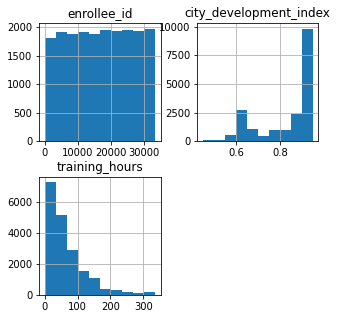

In [68]:
X_hr.hist(figsize=(5, 5))

#### 2.
Удалите все строки, где есть хотя бы одно пропущенное значение признака. Насколько сильно уменьшился размер датасета? Как изменились распределения признаков/статистика по количеству значений признаков?

In [69]:
print(f'Исходный размер датасета hr {X_hr.shape[0]}')

Исходный размер датасета hr 19158


In [70]:
X_hr_dropha = X_hr 
X_hr_dropha = X_hr_dropha[X_hr_dropha.gender.notna() & 
            X_hr_dropha.enrolled_university.notna() & 
            X_hr_dropha.company_size.notna() &
            X_hr_dropha.enrollee_id.notna() &
            X_hr_dropha.city.notna() &
            X_hr_dropha.city_development_index.notna() &
            X_hr_dropha.education_level.notna() &
            X_hr_dropha.relevent_experience.notna() &
            X_hr_dropha.major_discipline.notna() &
            X_hr_dropha.experience.notna() &
            X_hr_dropha.company_type.notna() &
            X_hr_dropha.last_new_job.notna() &
            X_hr_dropha.training_hours.notna()]




In [71]:
print(f'Pазмер датасета covid без NaN {X_hr_dropha.shape[0]}')

Pазмер датасета covid без NaN 8955


Уменьшилось на 10203

Давайте попробуем избежать сокращения размера датасета.

#### 3.
Для числовых признаков заполните пропущенные данные средним/медианой/модой данного признака. Объясните свой выбор. (Часть строк с NaN значениями можно удалить, если размер датасета уменьшится <15%)

In [72]:
X_hr.loc[X_hr['experience'] == '>20', 'experience'] = 21
X_hr.loc[X_hr['experience'] == '<1', 'experience'] = 0
X_hr.experience = pd.to_numeric(X_hr.experience)
X_hr.describe()
X_hr


,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,21.0,NaN,NaN,1,36
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,>4,47
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,never,83
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,never,52
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,21.0,50-99,Funded Startup,4,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14.0,NaN,NaN,1,42
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14.0,NaN,NaN,4,52
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,21.0,50-99,Pvt Ltd,4,44
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,0.0,500-999,Pvt Ltd,2,97


/Users/vasilijdronov/opt/miniconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


array([[<AxesSubplot:title={'center':'enrollee_id'}>,
        <AxesSubplot:title={'center':'city_development_index'}>],
       [<AxesSubplot:title={'center':'experience'}>,
        <AxesSubplot:title={'center':'training_hours'}>]], dtype=object)

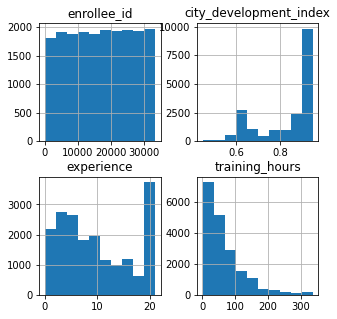

In [73]:
X_hr.hist(figsize=(5, 5))

In [74]:
print(X_hr.enrollee_id.fillna(16881.403231)) # среднее
print(X_hr.city_development_index.fillna(0.903000)) # медиана
print(X_hr.training_hours.fillna(65.130569)) # среднее
print(X_hr.experience.fillna(10.100141)) # среднее

0         8949
1        29725
2        11561
3        33241
4          666
         ...  
19153     7386
19154    31398
19155    24576
19156     5756
19157    23834
Name: enrollee_id, Length: 19158, dtype: int64
0        0.920
1        0.776
2        0.624
3        0.789
4        0.767
         ...  
19153    0.878
19154    0.920
19155    0.920
19156    0.802
19157    0.855
Name: city_development_index, Length: 19158, dtype: float64
0         36
1         47
2         83
3         52
4          8
        ... 
19153     42
19154     52
19155     44
19156     97
19157    127
Name: training_hours, Length: 19158, dtype: int64
0        21.0
1        15.0
2         5.0
3         0.0
4        21.0
         ... 
19153    14.0
19154    14.0
19155    21.0
19156     0.0
19157     2.0
Name: experience, Length: 19158, dtype: float64


#### 4.
Для категориальных признаков заполните пропущенные значения самой встречающейся категорией или создайте отдельную категорию пропущенных значений. Объясните свой выбор. (Часть строк с NaN значениями можно удалить, если размер датасета уменьшится <15%)

_Ваш ответ_

In [78]:
def fill_na(X, y):
    col = X.columns
    for i in col:
        if i not in ['enrollee_id', 'city_development_index', 'training_hours', 'experience']: #удаляю experience
            t = X[i].value_counts()[:1].index.tolist()
            X[i] = X[i].fillna(t[0])
    t = y.value_counts()[:1].index.tolist()
    y = y.fillna(t[0])
    tt = X.experience.value_counts().mean()
    X = X.experience.fillna(tt)
    
    
    X_fill, y_fill = X, y
    
    return X_fill, y_fill

def fill_na(X, y):
    col = X.columns
    for i in col:
        if i not in ['enrollee_id', 'city_development_index', 'training_hours', 'experience']:
            t = X[i].value_counts()[:1].index.tolist()
            X[i] = X[i].fillna(t[0])
    t = y.value_counts()[:1].index.tolist()
    y = y.fillna(t[0])
    tt = X.experience.value_counts().mean()
    X.experience = X.experience.fillna(tt)
    
    X_fill, y_fill = X, y
    
    return X_fill, y_fill

In [82]:
X_hr_fill, y_hr_fill = fill_na(X_hr, y_hr)
X_hr_fill
#X_hr_fill.gender= X_hr_fill.gender.fillna('Male')
#X_hr_fill.head(50)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,21.0,50-99,Pvt Ltd,1,36
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,>4,47
2,11561,city_21,0.624,Male,No relevent experience,Full time course,Graduate,STEM,5.0,50-99,Pvt Ltd,never,83
3,33241,city_115,0.789,Male,No relevent experience,no_enrollment,Graduate,Business Degree,0.0,50-99,Pvt Ltd,never,52
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,21.0,50-99,Funded Startup,4,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14.0,50-99,Pvt Ltd,1,42
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14.0,50-99,Pvt Ltd,4,52
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,21.0,50-99,Pvt Ltd,4,44
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,STEM,0.0,500-999,Pvt Ltd,2,97


#### 5. 
Как изменились распределения признаков/статистика по количеству значений признаков после заполнения пропущенных данных?

In [83]:
print(X_hr_fill['gender'].value_counts())
print()
print(X_hr_fill['city'].value_counts())
print()
print(X_hr_fill['relevent_experience'].value_counts())
print()
print(X_hr_fill['enrolled_university'].value_counts())
print()
print(X_hr_fill\
    .groupby(['education_level'], as_index = False) \
    .aggregate({'enrollee_id': 'count'}))
print(X_hr_fill['major_discipline'].value_counts())
print()
print(X_hr_fill['experience'].value_counts())
print()
print(X_hr_fill['company_size'].value_counts())
print()
print(X_hr_fill['company_type'].value_counts())
print()
print(X_hr_fill['last_new_job'].value_counts())
print()

Male      17729
Female     1238
Other       191
Name: gender, dtype: int64

city_103    4355
city_21     2702
city_16     1533
city_114    1336
city_160     845
            ... 
city_111       3
city_121       3
city_129       3
city_140       1
city_171       1
Name: city, Length: 123, dtype: int64

Has relevent experience    13792
No relevent experience      5366
Name: relevent_experience, dtype: int64

no_enrollment       14203
Full time course     3757
Part time course     1198
Name: enrolled_university, dtype: int64

  education_level  enrollee_id
0        Graduate        12058
1     High School         2017
2         Masters         4361
3             Phd          414
4  Primary School          308
STEM               17305
Humanities           669
Other                381
Business Degree      327
Arts                 253
No Major             223
Name: major_discipline, dtype: int64

21.000000     3286
5.000000      1430
4.000000      1403
3.000000      1354
6.000000      1216
2.0

Так как NaN были только в категориальных признаках, признаки с наибольшей частотой стали еще более выражены в выборке

### Задание

Выполните задание для датасета _covid_.

1. Найдите страну, для которой в датасете присутствует 46 дат со статистикой по вакцинации.
2. Постройте для этой страны график зависимости _total_vaccinations_ от _date_.
3. Заполните пропущенные данные о _total_vaccinations_ для этой страны. Объясните свой выбор.

In [84]:
new_frame = pd.DataFrame(X_covid.country.value_counts())
new_frame = new_frame.rename(columns = {'country':'number'})
#new_frame.head(50)
new_frame.query('number == 46')


,number
Bahrain,46


Bahrain

### Задание 
Выполните задание для датасета _hr_.

Есть ли в данных выбросы? Если да, то скажите, какие и почему Вы считаете их выбросами?


In [85]:
X_covid.describe()

,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
count,1.575000e+03,1.303000e+03,7.560000e+02,1.288000e+03,2.321000e+03,1575.000000,1303.000000,756.000000,2321.000000
mean,1.085211e+06,1.057652e+06,2.471170e+05,6.710791e+04,5.229246e+04,4.271486,4.269616,1.031283,1929.493322
std,3.538882e+06,3.290504e+06,8.118476e+05,1.847620e+05,1.519408e+05,8.242136,7.332910,2.880022,3501.260870
min,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,2.481600e+04,2.477300e+04,4.845500e+03,2.052250e+03,1.304000e+03,0.415000,0.480000,0.060000,330.000000
50%,1.320880e+05,1.328570e+05,2.039250e+04,1.060150e+04,6.149000e+03,1.570000,1.760000,0.330000,902.000000
75%,5.720050e+05,5.834280e+05,1.178248e+05,5.364400e+04,2.730400e+04,3.665000,3.275000,0.820000,1630.000000
max,3.903796e+07,3.120000e+07,8.317180e+06,2.218752e+06,1.355451e+06,62.870000,39.950000,23.280000,30869.000000


In [86]:
#X_covid.sort_values('total_vaccinations')
#X_covid.sort_values('people_vaccinated')
#X_covid.sort_values('people_fully_vaccinated')
#X_covid.sort_values('daily_vaccinations_raw') #мб
#X_covid.sort_values('daily_vaccinations') #мб рев
#X_covid.sort_values('total_vaccinations_per_hundred')
#X_covid.sort_values('people_vaccinated_per_hundred')
#X_covid.sort_values('people_fully_vaccinated_per_hundred')
#X_covid.sort_values('daily_vaccinations_per_million')
const = 246528
ranges = []
for i in range(10):
    ranges.append(i * const)
ranges
X_covid['daily_vaccinations_raw'].groupby(pd.cut(X_covid['daily_vaccinations_raw'].to_numpy(), ranges)).count()


(0, 246528]           1196
(246528, 493056]        56
(493056, 739584]         9
(739584, 986112]         6
(986112, 1232640]        5
(1232640, 1479168]       3
(1479168, 1725696]       6
(1725696, 1972224]       0
(1972224, 2218752]       1
Name: daily_vaccinations_raw, dtype: int64

In [87]:
outlier = X_covid[X_covid['daily_vaccinations_raw'].isin(range(1972224, 2218753))]
outlier

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
2362,United States,USA,2021-02-06,39037964.0,30250964.0,8317180.0,2218752.0,1351437.0,11.67,9.05,2.49,4041.0,"Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://covid.cdc.gov/covid-data-tracker/#vacc...


США можно рассматривать, как outlier, так как их статистика значительно опережает остальные страны

### Задание 
Выполните задание для датасета _hr_.

Закодируйте категориальные признаки при помощи One-hot encoding/Label encoding/Frequency encoding. Объясните свой выбор. (Обратите внимание, что некоторые категориальные признаки предполагают ранжирование в своих значениях)


In [88]:
X_hr_fill

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,21.0,50-99,Pvt Ltd,1,36
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,>4,47
2,11561,city_21,0.624,Male,No relevent experience,Full time course,Graduate,STEM,5.0,50-99,Pvt Ltd,never,83
3,33241,city_115,0.789,Male,No relevent experience,no_enrollment,Graduate,Business Degree,0.0,50-99,Pvt Ltd,never,52
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,21.0,50-99,Funded Startup,4,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14.0,50-99,Pvt Ltd,1,42
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14.0,50-99,Pvt Ltd,4,52
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,21.0,50-99,Pvt Ltd,4,44
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,STEM,0.0,500-999,Pvt Ltd,2,97


In [89]:
def encode(X):
    X.loc[X['relevent_experience'] == 'Has relevent experience', 'relevent_experience'] = 1
    X.loc[X['relevent_experience'] == 'No relevent experience', 'relevent_experience'] = 0
    
    X.loc[X['gender'] == 'Male', 'gender'] = 1
    X.loc[X['gender'] == 'Female', 'gender'] = 0
    X.loc[X['gender'] == 'Other', 'gender'] = 2
    
    enc_fr = (X.groupby('city').size()) / len(X)
    X['city'] = X['city'].apply(lambda x:enc_fr[x])
    
    X.loc[X['education_level'] == 'Primary School', 'education_level'] = 0
    X.loc[X['education_level'] == 'High School', 'education_level'] = 1
    X.loc[X['education_level'] == 'Graduate', 'education_level'] = 2
    X.loc[X['education_level'] == 'Masters', 'education_level'] = 3
    X.loc[X['education_level'] == 'Phd', 'education_level'] = 4
    
    X.loc[X['enrolled_university'] == 'no_enrollment', 'enrolled_university'] = 0
    X.loc[X['enrolled_university'] == 'Part time course', 'enrolled_university'] = 1
    X.loc[X['enrolled_university'] == 'Full time course', 'enrolled_university'] = 2
    
    enc_fr = (X.groupby('major_discipline').size()) / len(X)
    X['major_discipline'] = X['major_discipline'].apply(lambda x:enc_fr[x])
    
    X.loc[X['company_size'] == '<10', 'company_size'] = 0
    X.loc[X['company_size'] == '10/49', 'company_size'] = 1
    X.loc[X['company_size'] == '50-99', 'company_size'] = 2
    X.loc[X['company_size'] == '100-500', 'company_size'] = 3
    X.loc[X['company_size'] == '500-999', 'company_size'] = 4
    X.loc[X['company_size'] == '1000-4999', 'company_size'] = 5
    X.loc[X['company_size'] == '5000-9999', 'company_size'] = 6
    X.loc[X['company_size'] == '10000+', 'company_size'] = 7
    
    X.loc[X['last_new_job'] == 'never', 'last_new_job'] = 0
    X.loc[X['last_new_job'] == '>4', 'last_new_job'] = 5
    
    
    one_hot = pd.get_dummies(X['company_type'])
    X = X.drop('company_type', axis = 1)
    X.loc[:, 'Early Stage Startup'] = one_hot['Early Stage Startup']
    X.loc[:, 'NGO'] = one_hot['NGO']
    X.loc[:, 'Other'] = one_hot['Other']
    X.loc[:, 'Public Sector'] = one_hot['Public Sector']
    X.loc[:, 'Pvt Ltd'] = one_hot['Pvt Ltd']
    X.loc[:, 'Funded Startup'] = one_hot['Funded Startup']
    
#    X.join(one_hot) почему не сработал?
    
    X_encode = X
    return X_encode

In [90]:
X_hr_encode = encode(X_hr_fill)
X_hr_encode

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,last_new_job,training_hours,Early Stage Startup,NGO,Other,Public Sector,Pvt Ltd,Funded Startup
0,8949,0.227320,0.920,1,1,0,2,0.903278,21.0,2,1,36,0,0,0,0,1,0
1,29725,0.003549,0.776,1,0,0,2,0.903278,15.0,2,5,47,0,0,0,0,1,0
2,11561,0.141038,0.624,1,0,2,2,0.903278,5.0,2,0,83,0,0,0,0,1,0
3,33241,0.002819,0.789,1,0,0,2,0.017069,0.0,2,0,52,0,0,0,0,1,0
4,666,0.006681,0.767,1,1,0,3,0.903278,21.0,2,4,8,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,0.007882,0.878,1,0,0,2,0.034920,14.0,2,1,42,0,0,0,0,1,0
19154,31398,0.227320,0.920,1,1,0,2,0.903278,14.0,2,4,52,0,0,0,0,1,0
19155,24576,0.227320,0.920,1,1,0,2,0.903278,21.0,2,4,44,0,0,0,0,1,0
19156,5756,0.009135,0.802,1,1,0,1,0.903278,0.0,4,2,97,0,0,0,0,1,0


major_discipline - frequency code
compuny type - one-hot
others - label

### Задание 
Выполните задание для датасета _hr_.




#### 1. 
Реализуйте функцию undersampling

#### 2. 
Реализуйте функцию oversampling

In [91]:
X_hr_encode
#y_hr.count() - y_hr.sum()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,last_new_job,training_hours,Early Stage Startup,NGO,Other,Public Sector,Pvt Ltd,Funded Startup
0,8949,0.227320,0.920,1,1,0,2,0.903278,21.0,2,1,36,0,0,0,0,1,0
1,29725,0.003549,0.776,1,0,0,2,0.903278,15.0,2,5,47,0,0,0,0,1,0
2,11561,0.141038,0.624,1,0,2,2,0.903278,5.0,2,0,83,0,0,0,0,1,0
3,33241,0.002819,0.789,1,0,0,2,0.017069,0.0,2,0,52,0,0,0,0,1,0
4,666,0.006681,0.767,1,1,0,3,0.903278,21.0,2,4,8,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,0.007882,0.878,1,0,0,2,0.034920,14.0,2,1,42,0,0,0,0,1,0
19154,31398,0.227320,0.920,1,1,0,2,0.903278,14.0,2,4,52,0,0,0,0,1,0
19155,24576,0.227320,0.920,1,1,0,2,0.903278,21.0,2,4,44,0,0,0,0,1,0
19156,5756,0.009135,0.802,1,1,0,1,0.903278,0.0,4,2,97,0,0,0,0,1,0


In [92]:
def undersampling(X, y):
    X.loc[:, 'y'] = y
    num_minority = X.query("y == '1'").aggregate({'y':'count'})
    num_majority = X.query("y == '0'").aggregate({'y':'count'})
    down_on = num_majority[0] - num_minority[0] 
    X_Male = X.query("y == '0'")
    X_Female = X.query("y == '1'")
    X_Male = X_Male.reset_index(drop=True)
    X_Male_dropped = X_Male.drop(X_Male.sample(n=down_on).index)
    X = pd.concat([X_Male_dropped, X_Female], ignore_index=True)
    y = X.y
    X = X.drop('y', 1)
    X_under, y_under = X, y
    return X_under, y_under

def oversampling(X, y):
    X.loc[:, 'y'] = y
    X_Female = X.query("y == '1'")
    X_Male = X.query("y == '0'")
    k = X_Male.shape[0]//X_Female.shape[0]
    for i in range(k-1):
        X = pd.concat([X, X_Female], ignore_index=True)
    X_Female = X.query("y == '1'")
    X_Male = X.query("y == '0'")
    X = pd.concat([X, X_Female[:X_Male.shape[0]-X_Female.shape[0]]], ignore_index=True)
    y = X.y
    X = X.drop('y', 1)
    X_over, y_over = X, y
    return X_over, y_over

In [93]:
X_hr_under, y_hr_under = undersampling(X_hr_encode, y_hr_fill)

X_hr_over, y_hr_over = oversampling(X_hr_encode, y_hr_fill)

X_hr_over

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,last_new_job,training_hours,Early Stage Startup,NGO,Other,Public Sector,Pvt Ltd,Funded Startup
0,8949,0.227320,0.920,1,1,0,2,0.903278,21.0,2,1,36,0,0,0,0,1,0
1,29725,0.003549,0.776,1,0,0,2,0.903278,15.0,2,5,47,0,0,0,0,1,0
2,11561,0.141038,0.624,1,0,2,2,0.903278,5.0,2,0,83,0,0,0,0,1,0
3,33241,0.002819,0.789,1,0,0,2,0.017069,0.0,2,0,52,0,0,0,0,1,0
4,666,0.006681,0.767,1,1,0,3,0.903278,21.0,2,4,8,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28757,4120,0.080019,0.910,1,0,2,3,0.903278,13.0,2,3,17,0,0,0,0,1,0
28758,22899,0.014354,0.887,1,1,0,3,0.903278,9.0,3,1,31,0,0,0,0,1,0
28759,29529,0.004280,0.903,1,1,0,2,0.903278,3.0,3,1,55,0,0,0,0,1,0
28760,4478,0.012893,0.550,1,1,0,2,0.903278,5.0,2,1,7,0,0,0,0,1,0


In [94]:
X_hr_under

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,last_new_job,training_hours,Early Stage Startup,NGO,Other,Public Sector,Pvt Ltd,Funded Startup
0,11561,0.141038,0.624,1,0,2,2,0.903278,5.0,2,0,83,0,0,0,0,1,0
1,5826,0.141038,0.624,1,0,0,2,0.903278,2.0,2,0,24,0,0,0,0,1,0
2,8722,0.141038,0.624,1,0,2,1,0.903278,5.0,2,0,26,0,0,0,0,1,0
3,6491,0.015868,0.804,1,1,0,3,0.903278,10.0,2,1,48,0,0,0,0,1,0
4,7041,0.003549,0.776,1,1,0,2,0.034920,0.0,5,1,65,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9549,21319,0.141038,0.624,1,0,2,2,0.903278,1.0,3,1,52,0,0,0,0,1,0
9550,9212,0.141038,0.624,1,1,0,3,0.903278,3.0,3,3,40,0,0,0,0,1,0
9551,251,0.227320,0.920,1,1,0,3,0.903278,9.0,2,1,36,0,0,0,0,1,0
9552,7386,0.007882,0.878,1,0,0,2,0.034920,14.0,2,1,42,0,0,0,0,1,0


#### 3. 
Используйте _SMOTE_ для балансировки датасета.

Помимо методов _undersampling_ и _oversampling_ существует подход, генерирующий элементы класса-меньшинства, похожие на уже присутствующие в выборке данных. Такой метод называется _Synthetic Minority Oversampling Technique_ (SMOTE). 

Метод _SMOTE_ , реализованный в библиотеке `imblearn`, генерирует синтетические примеры при помощи __k-nearest neighbor__ алгоритма (подробнее об этом алгоритме будет рассказано на лекции).

In [95]:
!pip install -U imbalanced-learn

In [96]:
X_hr_encode.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'last_new_job',
       'training_hours', 'Early Stage Startup', 'NGO', 'Other',
       'Public Sector', 'Pvt Ltd', 'Funded Startup', 'y'],
      dtype='object')

In [97]:
print(X_hr_encode.enrolled_university.isna().sum())
print(X_hr_encode.education_level.isna().sum())
print(X_hr_encode.major_discipline.isna().sum())
print(X_hr_encode.experience.isna().sum())
print(X_hr_encode.company_size.isna().sum())
print(X_hr_encode.last_new_job.isna().sum())
print(X_hr_encode.training_hours.isna().sum())
print(X_hr_encode['Early Stage Startup'].isna().sum())
print(X_hr_encode.NGO.isna().sum())

0
0
0
0
0
0
0
0
0


In [98]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_hr_SMOTE, y_hr_SMOTE = smote.fit_resample(X_hr_encode, y_hr_fill)

X_hr_SMOTE

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,last_new_job,training_hours,Early Stage Startup,NGO,Other,Public Sector,Pvt Ltd,Funded Startup,y
0,8949,0.227320,0.920000,1,1,0,2,0.903278,21.000000,2,1,36,0,0,0,0,1,0,1.0
1,29725,0.003549,0.776000,1,0,0,2,0.903278,15.000000,2,5,47,0,0,0,0,1,0,0.0
2,11561,0.141038,0.624000,1,0,2,2,0.903278,5.000000,2,0,83,0,0,0,0,1,0,0.0
3,33241,0.002819,0.789000,1,0,0,2,0.017069,0.000000,2,0,52,0,0,0,0,1,0,1.0
4,666,0.006681,0.767000,1,1,0,3,0.903278,21.000000,2,4,8,0,0,0,0,0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28757,21948,0.014412,0.857461,1,1,0,2,0.903278,16.111606,3.7779,1.4442,45,0,0,0,0,1,0,1.0
28758,2203,0.085232,0.764499,1,1,0.553972,2,0.903278,7.122196,4.76986,2.21589,52,0,0,0,0,1,0,1.0
28759,28043,0.082442,0.826768,1,1,0,2.35256,0.903278,9.993484,2,2,112,0,0,0,0,1,0,1.0
28760,5585,0.141038,0.624000,1,1,0,3,0.903278,13.404979,3.3659,3.69272,149,0,0,0,0,1,0,1.0


#### 4.
Как изменились распределения признаков при различных тактиках балансирования датасета?

/Users/vasilijdronov/opt/miniconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


array([[<AxesSubplot:title={'center':'enrollee_id'}>,
        <AxesSubplot:title={'center':'city'}>,
        <AxesSubplot:title={'center':'city_development_index'}>],
       [<AxesSubplot:title={'center':'major_discipline'}>,
        <AxesSubplot:title={'center':'experience'}>,
        <AxesSubplot:title={'center':'training_hours'}>],
       [<AxesSubplot:title={'center':'Pvt Ltd'}>,
        <AxesSubplot:title={'center':'Funded Startup'}>,
        <AxesSubplot:title={'center':'Public Sector'}>],
       [<AxesSubplot:title={'center':'Early Stage Startup'}>,
        <AxesSubplot:title={'center':'NGO'}>,
        <AxesSubplot:title={'center':'Other'}>]], dtype=object)

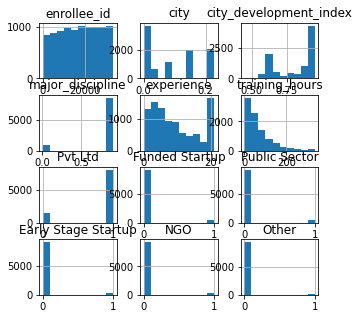

In [298]:
X_hr_under.hist(figsize=(5, 5))

array([[<AxesSubplot:title={'center':'enrollee_id'}>,
        <AxesSubplot:title={'center':'city'}>,
        <AxesSubplot:title={'center':'city_development_index'}>],
       [<AxesSubplot:title={'center':'major_discipline'}>,
        <AxesSubplot:title={'center':'experience'}>,
        <AxesSubplot:title={'center':'training_hours'}>],
       [<AxesSubplot:title={'center':'Pvt Ltd'}>,
        <AxesSubplot:title={'center':'Funded Startup'}>,
        <AxesSubplot:title={'center':'Public Sector'}>],
       [<AxesSubplot:title={'center':'Early Stage Startup'}>,
        <AxesSubplot:title={'center':'NGO'}>,
        <AxesSubplot:title={'center':'Other'}>]], dtype=object)

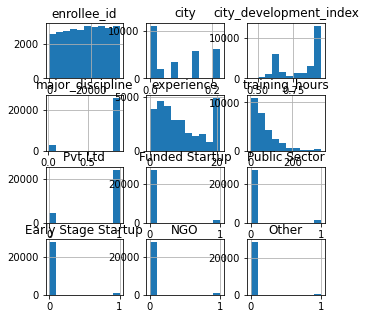

In [299]:
X_hr_over.hist(figsize=(5, 5))

Есть несуществуенная разница